### Into to data science

- реляционный вид данных
- матричное представление 
- паплайн обработки данных
    - discovering structure 
    - descriptive analysis 
    - dealing with missing 
    - types of variables 
    - nominal \ categorical varibales
    - dummy \ OHE
    - pandas-profiling 
    - accelarations (numpy, numba, desk)
- numpy
- pandas 
    - types
    - DataFrame
    - slicing
    - methods
    - data transformations (group by, pivot) 
    

### numpy

In [64]:
import numpy as np

In [5]:
a = np.arange(15)
b = np.arange(15, 30)

In [6]:
type(b)

numpy.ndarray

In [10]:
a.reshape(3,5)

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14]])

In [11]:
a.shape

(15,)

In [13]:
a.ndim

1

In [19]:
a.reshape(3,5).T.dot(b.reshape(3,5))

array([[350, 365, 380, 395, 410],
       [410, 428, 446, 464, 482],
       [470, 491, 512, 533, 554],
       [530, 554, 578, 602, 626],
       [590, 617, 644, 671, 698]])

In [20]:
l = [1,2,3]
ln = np.array(l)

In [24]:
ln = np.array(l, dtype=complex)

In [ ]:
ln

#### zeros \ ones

In [41]:
z = np.zeros((3,4))
np.fill_diagonal(z, 1)

In [42]:
z

array([[1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.]])

In [27]:
np.ones((3,4))

array([[1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.]])

#### linspace

In [29]:
np.linspace(0, 1, 10)

array([0.        , 0.11111111, 0.22222222, 0.33333333, 0.44444444,
       0.55555556, 0.66666667, 0.77777778, 0.88888889, 1.        ])

#### product 

In [33]:
a = np.arange(15).reshape(3,5)
b = np.arange(15, 30).reshape(3,5)

In [34]:
a * b

array([[  0,  16,  34,  54,  76],
       [100, 126, 154, 184, 216],
       [250, 286, 324, 364, 406]])

In [36]:
a @ b.T

array([[ 180,  230,  280],
       [ 605,  780,  955],
       [1030, 1330, 1630]])

#### random

In [43]:
np.random.random_sample((3,4))

array([[0.87710091, 0.44336631, 0.8677405 , 0.32870597],
       [0.97931838, 0.03264175, 0.84217931, 0.86801618],
       [0.79537719, 0.18709659, 0.30194522, 0.81835995]])

### pandas

[police dataset](https://www.kaggle.com/melihkanbay/police)

**stop_date** stop date <br>
**stop_time** stop time<br>
**county_name** County name where provided<br>
**driver_gender** The recorded sex of the stopped subject.<br>
**driver_age_raw** driver age raw<br>
**driver_age** driver age<br>
**driver_race** driver race<br>
**violation_raw** violation var<br>
**violation** violation<br>
**search_conducted** search conducted<br>
**search_type** search type<br>
**stop_outcome** stop outcome<br>
**is_arrested** arrested<br>
**stop_duration** stop duration<br>
**drugs_related_stop** drugs related stop

creation from json

In [19]:
### code

In [1]:
import pandas as pd

In [3]:
df = pd.read_csv('police.csv')

In [4]:
df.shape

(91741, 15)

In [5]:
df.head()

,stop_date,stop_time,county_name,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop
0,2005-01-02,01:55,NaN,M,1985.0,20.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
1,2005-01-18,08:15,NaN,M,1965.0,40.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
2,2005-01-23,23:15,NaN,M,1972.0,33.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
3,2005-02-20,17:15,NaN,M,1986.0,19.0,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False
4,2005-03-14,10:00,NaN,F,1984.0,21.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False


In [6]:
df.columns

Index(['stop_date', 'stop_time', 'county_name', 'driver_gender',
       'driver_age_raw', 'driver_age', 'driver_race', 'violation_raw',
       'violation', 'search_conducted', 'search_type', 'stop_outcome',
       'is_arrested', 'stop_duration', 'drugs_related_stop'],
      dtype='object')

In [8]:
df['is_arrested'].describe()

count     86408
unique        2
top       False
freq      83479
Name: is_arrested, dtype: object

In [9]:
df['is_arrested'].unique()

array([False, True, nan], dtype=object)

In [10]:
df.describe()

,county_name,driver_age_raw,driver_age
count,0.0,86414.000000,86120.000000
mean,NaN,1970.491228,34.011333
std,NaN,110.914909,12.738564
min,NaN,0.000000,15.000000
25%,NaN,1967.000000,23.000000
50%,NaN,1980.000000,31.000000
75%,NaN,1987.000000,43.000000
max,NaN,8801.000000,99.000000


In [18]:
df.describe(include='object') #['object', 'float', 'int'] 

,stop_date,stop_time,driver_gender,driver_race,violation_raw,violation,search_type,stop_outcome,is_arrested,stop_duration
count,91741,91741,86406,86408,86408,86408,3196,86408,86408,86408
unique,3768,1436,2,5,12,6,24,6,2,5
top,2012-01-11,11:00,M,White,Speeding,Speeding,Incident to Arrest,Citation,False,0-15 Min
freq,69,323,62895,62158,48463,48463,1219,77006,83479,69543


### fillna \ dropna

### astype

### loc \ iloc

### rename \ replace 

### groupby

In [21]:
df.groupby('is_arrested').agg(['count', 'mean'])

county_name      driver_age_raw              driver_age  \
                  count mean          count         mean      count   
is_arrested                                                           
False                 0  NaN          83478  1970.322864      83190   
True                  0  NaN           2929  1976.623080       2925   

                       search_conducted           drugs_related_stop            
                  mean            count      mean              count      mean  
is_arrested                                                                     
False        34.088881            83479  0.025192              83479  0.007235  
True         31.815385             2929  0.373165               2929  0.072038

### pivot

In [22]:
df.pivot_table(index=['is_arrested'], values= ['drugs_related_stop'], aggfunc= lambda x: list(x))

,drugs_related_stop
is_arrested,
False,"[False, False, False, False, False, False, Fal..."
True,"[False, False, False, False, True, False, Fals..."


In [23]:
df.index

RangeIndex(start=0, stop=91741, step=1)

In [33]:
import matplotlib.pyplot as plt
df['is_arrestes'].hist()

### to_....

## SKLEARN

In [34]:
# preproc

df.describe(include='object') # driver_gender driver_race

,stop_date,stop_time,driver_gender,driver_race,violation_raw,violation,search_type,stop_outcome,is_arrested,stop_duration
count,91741,91741,86406,86408,86408,86408,3196,86408,86408,86408
unique,3768,1436,2,5,12,6,24,6,2,5
top,2012-01-11,11:00,M,White,Speeding,Speeding,Incident to Arrest,Citation,False,0-15 Min
freq,69,323,62895,62158,48463,48463,1219,77006,83479,69543


In [71]:
df_models = df.dropna(subset=['is_arrested','driver_gender', 'driver_race']).reset_index(drop=True)

In [72]:
df.shape

(91741, 15)

In [73]:
df_models.shape

(86406, 15)

In [74]:
df_models['is_arrested'].unique()

array([False, True], dtype=object)

In [75]:
df_models['target'] = df_models['is_arrested'].replace({False:0, True:1})

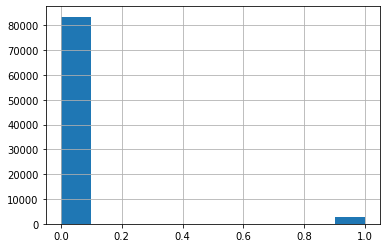

In [76]:
df_models.target.hist()

### ohe \ dummies

In [94]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(handle_unknown='ignore')
m = enc.fit_transform([[i]for i in df_models['driver_gender']])

In [95]:
df1 = pd.DataFrame(m.todense(), columns=enc.categories_)
#pd.get_dummies(df_models['driver_gender'])

In [96]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(handle_unknown='ignore')
m = enc.fit_transform([[i]for i in df_models['driver_race']])

In [97]:
df2 = pd.DataFrame(m.todense(), columns=enc.categories_)

In [98]:
fin = pd.merge(df1, df2, left_index=True, right_index=True).join(df_models['target'])
del df1
del df2

In [99]:
fin.columns = ['F', 'M', 'Asian', 'Black', 'Hispanic', 'Other', 'White', 'target']

In [100]:
list(fin.columns)

['F', 'M', 'Asian', 'Black', 'Hispanic', 'Other', 'White', 'target']

In [101]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(fin[['F', 'M', 'Asian', 'Black', 'Hispanic', 'Other', 'White']], \
                                                    fin['target'], test_size=0.33, random_state=42)

In [105]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0).fit(X_train, y_train)

/home/serge/Desktop/nlp2/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [110]:
clf.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0])

In [111]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, clf.predict(X_test))

0.9660166935540436

### statmodels

In [115]:
import statsmodels.formula.api as sm
 
model = sm.logit('target~F + M + Asian + Black + Hispanic + Other + White', data=fin) 
result = model.fit()

         Current function value: 0.144948
         Iterations: 35


/home/serge/Desktop/nlp2/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [116]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 target   No. Observations:                86406
Model:                          Logit   Df Residuals:                    86400
Method:                           MLE   Df Model:                            5
Date:                Thu, 13 Feb 2020   Pseudo R-squ.:                 0.02089
Time:                        00:21:17   Log-Likelihood:                -12524.
converged:                      False   LL-Null:                       -12792.
Covariance Type:            nonrobust   LLR p-value:                2.812e-113
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -2.1696   8.53e+05  -2.54e-06      1.000   -1.67e+06    1.67e+06
F             -1.2415   8.22e+05  -1.51e-06      1.000   -1.61e+06    1.61e+06
M             -0.9281   8.22e+05  -1.13e-06      1.000   -1.61e+06    1.61e+06
Asian         -0.8299   3.39e+05  -2.45e-06      1.000   -6.65e+05    6.65e+05
Black          0.3615   3.39e+05   1.07e-06      1.000   -6.65e+05    6.65e+05
Hispanic       0.3930   3.39e+05   1.16e-06      1.000   -6.65e+05    6.65e+05
Other         -1.6519   3.39e+05  -4.87e-06      1.000   -6.65e+05    6.65e+05
White         -0.4423   3.39e+05   -1.3e-06      1.000   -6.65e+05    6.65e+05
==============================================================================
"""

In [118]:
from statsmodels.discrete.discrete_model import Logit
 
model = Logit(fin['target'], fin[['F', 'M', 'Asian', 'Black', 'Hispanic', 'Other', 'White']]) 
                                                    
result = model.fit()

Optimization terminated successfully.
         Current function value: 0.144948
         Iterations 16


In [119]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 target   No. Observations:                86406
Model:                          Logit   Df Residuals:                    86400
Method:                           MLE   Df Model:                            5
Date:                Thu, 13 Feb 2020   Pseudo R-squ.:                 0.02089
Time:                        00:23:08   Log-Likelihood:                -12524.
converged:                       True   LL-Null:                       -12792.
Covariance Type:            nonrobust   LLR p-value:                2.812e-113
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
F             -2.7912   3.33e+05  -8.37e-06      1.000   -6.54e+05    6.54e+05
M             -2.4777   3.33e+05  -7.43e-06      1.000   -6.54e+05    6.54e+05
Asian         -1.4497   3.33e+05  -4.35e-06      1.000   -6.54e+05    6.54e+05
Black         -0.2584   3.33e+05  -7.75e-07      1.000   -6.54e+05    6.54e+05
Hispanic      -0.2269   3.33e+05   -6.8e-07      1.000   -6.54e+05    6.54e+05
Other         -2.2717   3.33e+05  -6.81e-06      1.000   -6.54e+05    6.54e+05
White         -1.0622   3.33e+05  -3.19e-06      1.000   -6.54e+05    6.54e+05
==============================================================================
"""

## Problem

- try another models: <br>
    - random forest<br>
    - smv<br>
    - knn <br>
    - kmeans (decide which varibles you want clusterize)<br>
    - try reguliriaztions (Lasso, Ridge)<br>
    - apply gaussian processes to date varibles and is_arrested (use datetime module)<br>
- visualize following models <br>
    - random forest <br>
    - svm<br>
    - kmeans (use t-sne)<br>